# Series de Taylor con `SymPy`
`SymPy` tiene su propias funcion para calcular las series de Taylor

In [1]:
from sympy import series, symbols
import sympy as sp
x = symbols('x')
expr = sp.sin(x)
series(expr, x, 0, n=10)

x - x**3/6 + x**5/120 - x**7/5040 + x**9/362880 + O(x**10)

In [2]:
exp2= series(sp.sin(x), x, 0, n=10)*series(sp.cos(x), x, 0, n=8)
exp2

(1 - x**2/2 + x**4/24 - x**6/720 + O(x**8))*(x - x**3/6 + x**5/120 - x**7/5040 + x**9/362880 + O(x**10))

In [3]:
exp2.expand()

x - 2*x**3/3 + 2*x**5/15 - 4*x**7/315 + O(x**9)

In [4]:
# Qutar el sumbolo O
series( expr, x, 0, n=10).removeO() # quita el simbolo O

x**9/362880 - x**7/5040 + x**5/120 - x**3/6 + x

In [5]:
# que tal si queremos expandir al redededor de 1
series (expr, x, 1, n=10)

sin(1) + (x - 1)*cos(1) - (x - 1)**2*sin(1)/2 - (x - 1)**3*cos(1)/6 + (x - 1)**4*sin(1)/24 + (x - 1)**5*cos(1)/120 - (x - 1)**6*sin(1)/720 - (x - 1)**7*cos(1)/5040 + (x - 1)**8*sin(1)/40320 + (x - 1)**9*cos(1)/362880 + O((x - 1)**10, (x, 1))

# Funciones  a trozos (`Piecewise`)
Por ejemplo la Heaviside


\begin{eqnarray}
H(x) = \theta(x) = \left \{
    \begin{array}{cc}
    1 & \text{ si } x > 0 \\
    0 & \text{ si } x < 0 \\
    1/2 & \text{ si } x = 0 \\
    \end{array}
    \right .
\end{eqnarray}

 Heaviside function f=Piecewise((1, x > 0), (0, x < 0))
g(0) nan


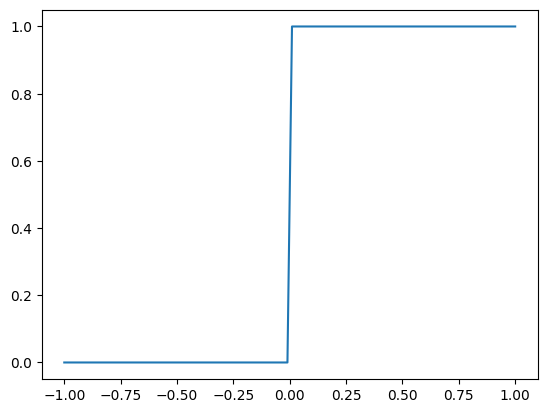

In [6]:
from sympy import Piecewise, lambdify
import numpy as np
import matplotlib.pyplot as plt
x = symbols('x', real=True)

# definimios la funcion a trozos
f = Piecewise(
    (1, x> 0),
    (0, x<0),
    (1/2, x==0)
)

print(f" Heaviside function f={f}")
g = lambdify(x,f)
print("g(0)", g(0))


# dominio
domain = np.linspace(-1,1,100)

plt.plot(domain, g(domain))

### Actividad 1 : Why $g(0)$ es nan?

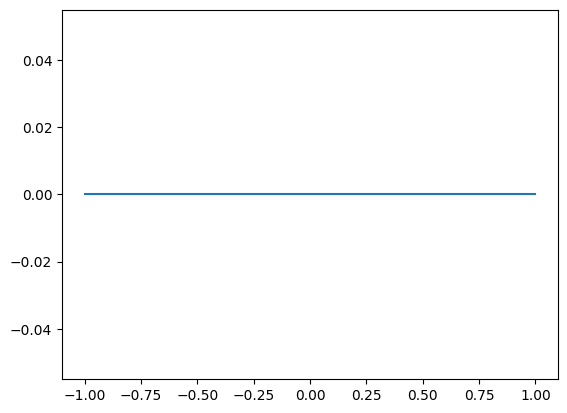

In [7]:
# saquemos la derivada
from sympy import diff

dfdx = diff(f, x)
dfdxl = lambdify(x, dfdx)

plt.plot(domain, dfdxl(domain))

In [8]:
# introducimos DeltaDirac que es la derivada de la Heavisdie
from sympy import symbols, diff, Heaviside, DiracDelta
H=Heaviside(x)
derivative = diff(H, x)
display("derivative of Heavisde", derivative)

delta_function = DiracDelta(x)

print("Dirac Delta Function", delta_function)

'derivative of Heavisde'

DiracDelta(x)

Dirac Delta Function DiracDelta(x)


In [9]:
# verificamos que la derivada del Heaviside es Delta
derivative == delta_function

True

In [10]:
H == g

False

In [11]:
hl = lambdify(x, H, "numpy")
hl

<function _lambdifygenerated(x)>

In [12]:
[hl(x) for x in range(-10,10)]

[array(0.),
 array(0.),
 array(0.),
 array(0.),
 array(0.),
 array(0.),
 array(0.),
 array(0.),
 array(0.),
 array(0.),
 array(0.5),
 array(1.),
 array(1.),
 array(1.),
 array(1.),
 array(1.),
 array(1.),
 array(1.),
 array(1.),
 array(1.)]

In [13]:
g = lambdify(x,f, "numpy")
[g(x) for x in range(-10,10)]

[array(0.),
 array(0.),
 array(0.),
 array(0.),
 array(0.),
 array(0.),
 array(0.),
 array(0.),
 array(0.),
 array(0.),
 array(nan),
 array(1.),
 array(1.),
 array(1.),
 array(1.),
 array(1.),
 array(1.),
 array(1.),
 array(1.),
 array(1.)]

In [14]:
g(0)

array(nan)

### Actividad 2.
El sistema como tal no grafico la funcion `DiracDelta`. Como se grafica la funcion `DiracDelta` en Python. Haga su mejor esfuerzo.




### Funcion ReLU
Es 0 para $x \le 0$ y es $x$ para $ x > 0$

In [15]:
# la funcion ReLu es la integral de la Heaviside
from sympy import integrate
relu = integrate(Heaviside(x),x)
display(relu)

x*Heaviside(x)

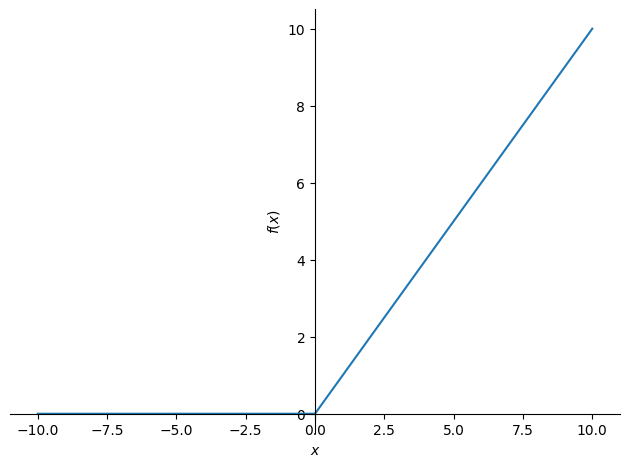

In [16]:
# grafique directamente sin ir a matplotlib
from sympy.plotting import plot
plot(relu)

# Calculo Multidimensional
## Vectores
Comparamos los vectores en `NumPy` con aquellos en `SymPy`

In [17]:
# vectores columna
A = np.array( [ [1], [3], [5] ] )
B = np.array( [ [0], [2], [4] ] )
print("A = \n", A)
print("\n")
print("B = \n", B)

A = 
 [[1]
 [3]
 [5]]


B = 
 [[0]
 [2]
 [4]]


In [18]:
# vectores fila
A = np.array( [1,3,5])
B = np.array( [0,2,4])
print(A,B)

[1 3 5] [0 2 4]


In [19]:
# en Sympy
from sympy import Matrix, symbols
u1, u2, u3, v1, v2, v3 = symbols('u_1, u_2, u_3, v_1, v_2, v_3')

U = Matrix( [u1, u2, u3])
U

Matrix([
[u_1],
[u_2],
[u_3]])

In [20]:
V = Matrix([v1, v2, v3])
V

Matrix([
[v_1],
[v_2],
[v_3]])

In [21]:
# operaciones entre vectores
display(U+V)
print(A + B)

Matrix([
[u_1 + v_1],
[u_2 + v_2],
[u_3 + v_3]])

[1 5 9]


### Operaciones entre vectores

* Suma/resta (el ejemplo anterior)
* Producto por escalar (es el producto "*")
* Producto punto: $x \cdot y$
* Producto cruz es: "$\times$" $x \times y$
* Producto Hadamard (punto-a-punto) $x \circ y$

In [22]:
# producto punto en numpy o sympy
display(U.dot(V)) # sympy
A.dot(B) # numpy

u_1*v_1 + u_2*v_2 + u_3*v_3

26

In [23]:
# producto cruz solo para 3D
U.cross(V)


Matrix([
[ u_2*v_3 - u_3*v_2],
[-u_1*v_3 + u_3*v_1],
[ u_1*v_2 - u_2*v_1]])

In [24]:
# producto Hadamard (punto-a-punto)
U.multiply_elementwise(V)

Matrix([
[u_1*v_1],
[u_2*v_2],
[u_3*v_3]])

In [25]:
# es diferente
np.multiply(A, B)

array([ 0,  6, 20])

### Longitud o norma de un vector (la norma 2)

$x = (x_1, x_2, \cdots, x_n)$

$$\| x \| = \sqrt{x_1^2 + x_2^2 + \cdots + x_n^2} .$$

In [26]:
# en numpy
np.linalg.norm(A)

5.916079783099616

In [27]:
U.norm()

sqrt(Abs(u_1)**2 + Abs(u_2)**2 + Abs(u_3)**2)

### Actividad #3
Por que pone barras en las coordenadas. Como quitar las barras?

## Proyeccion de vectores.
Ver notas a mano alzada

In [28]:
# veamos la proyeccion en sympy
# ojo! algo nuevo "*" es producto de escalar por vector
PvU = (U.dot(V))/V.dot(V)*V
PvU

Matrix([
[v_1*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(v_1**2 + v_2**2 + v_3**2)],
[v_2*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(v_1**2 + v_2**2 + v_3**2)],
[v_3*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(v_1**2 + v_2**2 + v_3**2)]])

### Actividad #4.
Sacar factor comun de este vector.

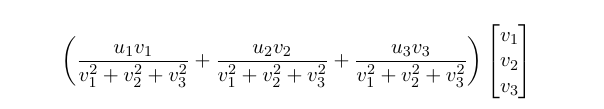

### Actividad #5.
Grafique un  vector $U$, direccion $V$ y su proyeccion en 3D $P_vU$. Como sigue:

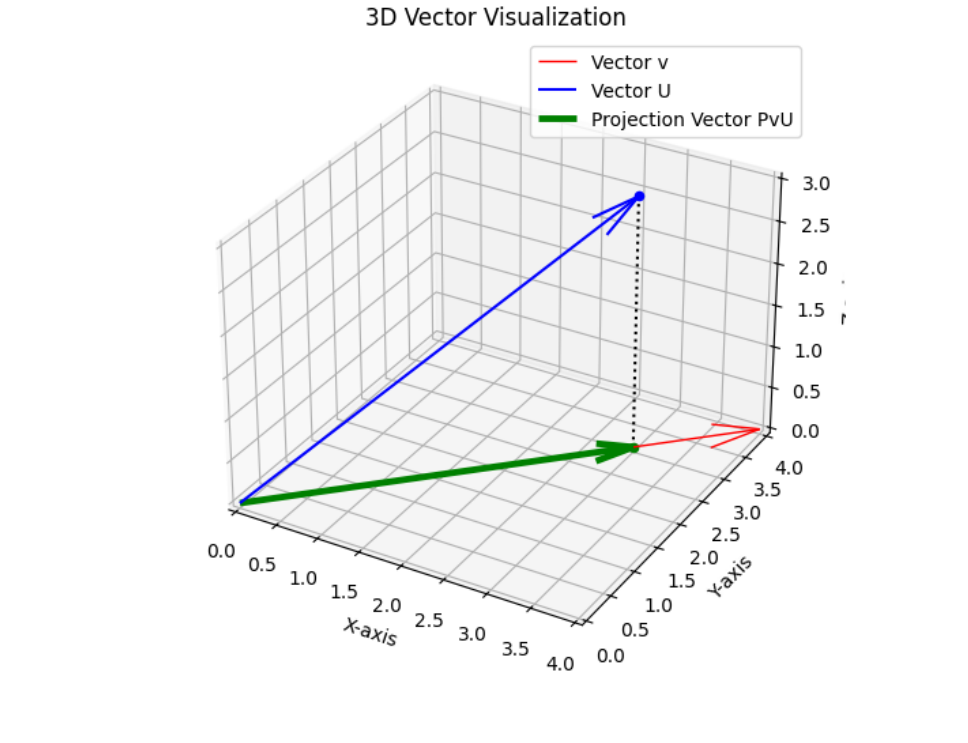

Ayuda: Use `matplotlib`....si la puede hacer con `sympy plot` no hay problema.

## Lineas en el espacio.
Un poco de teoria en 3D


\begin{eqnarray}
L: \mathbb{R} &\to& \mathbb{R}^3 \\
t &\mapsto& (x_1(t), x_2(t), x_3(t))
\end{eqnarray}
donde $X=(x_1, x_2, x_3)$, $U=(u_1, u_2, u_3)$ y

$X_0=(x_{01}, x_{02}, x_{03}) el punto por donde pasa la linea


$$ X = X_0 + t U $$.

In [35]:
x1, x2, x3 = symbols('x_1 x_2 x_3')
u1, u2, u3 = symbols('u_1 u_2 u_3')

X0 = Matrix( [x1, x2, x3])
U = Matrix( [u1, u2, u3])
t = symbols('t')

Line = X0 + t*U

Line


Matrix([
[t*u_1 + x_1],
[t*u_2 + x_2],
[t*u_3 + x_3]])

In [39]:
# ejemplo
# X0 = np.array( [1,0, 2,0, 0.0]) # note que el 1,0 debe ser 1.0
# X0 = np.array( [1.0, 2.0, 0.0]) # note que el 2,0 debe ser 2.0
X0 = np.array( [1.0, 2.0, 0.0])
# U = np.array( [1,0, 1,0, 2.0]) # note que el 1,0 debe ser 1.0,
U = np.array( [1.0, 1.0, 2.0])

LineEval = Line.subs( [ (x1, X0[0]), (x2, X0[1]), (x3, X0[2]), (u1, U[0]),
                       (u2, U[1]), (u3, U[2])] )
LineEval

Matrix([
[1.0*t + 1.0],
[1.0*t + 2.0],
[      2.0*t]])

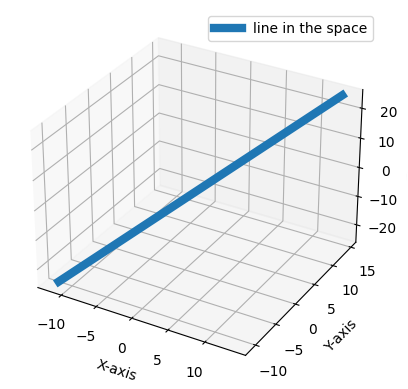

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import lambdify

ax = plt.figure().add_subplot(projection='3d')

# Prepare arrays x, y, z
w = np.linspace(-4 * np.pi, 4 * np.pi, 100)
x = lambdify(t, LineEval[0])
y = lambdify(t, LineEval[1])
z = lambdify(t, LineEval[2])

# Set labels for the axes
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

ax.plot(x(w), y(w), z(w), label='line in the space', linewidth=6)
ax.legend()

plt.show()